In [7]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pandas
from IPython.display import display

In [8]:
'''
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)

'''

adult_df = pandas.read_csv("./data/All_Data -adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/All_Data -compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/All_Data -bank.csv", index_col=0)
german_df = pandas.read_csv("./data/All_Data -german.csv", index_col=0)


for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Privileged base Rate"] - df["Unprivileged base Rate"] 
    df["Accuracy Diff"] = df["Accuracy - Privileged"] - df["Accuracy - Unprivileged"] 
    df["F1 Score Diff"] = df["F1 Score - Privileged"] - df["F1 Score - Unprivileged"] 
    df["base Rate"] = (df["Num True Pos"] + df["Num False Pos"])/(df["Num True Pos"] + df["Num True Neg"] + df["Num False Pos"] + df["Num False Neg"])
    for metric in df.columns:
        if "Num" in metric:
            df.drop(metric, axis=1, inplace=True)

In [9]:
def num_interventions(name):
    if "Logistic Regression" in name:
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3
    
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(no_int)
print(one_int)
print(two_int)
print(three_int)

['Logistic Regression - 3', 'Logistic Regression - 11', 'Logistic Regression - 17']
['OP - 3', 'OP - 11', 'OP - 17', 'DIR - 3', 'DIR - 11', 'DIR - 17', 'EOP - 3', 'EOP - 11', 'EOP - 17', 'CEOP - 3', 'CEOP - 11', 'CEOP - 17', 'ROC - 3', 'ROC - 11', 'ROC - 17', 'GFC - 3', 'GFC - 11', 'GFC - 17', 'PR - 3', 'PR - 11', 'PR - 17', 'EGR - 3', 'EGR - 11', 'EGR - 17', 'GSR - 3', 'GSR - 11', 'GSR - 17']
['OP + EOP - 3', 'OP + EOP - 11', 'OP + EOP - 17', 'OP + CEOP - 3', 'OP + CEOP - 11', 'OP + CEOP - 17', 'OP + ROC - 3', 'OP + ROC - 11', 'OP + ROC - 17', 'OP + GFC - 3', 'OP + GFC - 11', 'OP + GFC - 17', 'OP + PR - 3', 'OP + PR - 11', 'OP + PR - 17', 'OP + EGR - 3', 'OP + EGR - 11', 'OP + EGR - 17', 'OP + GSR - 3', 'OP + GSR - 11', 'OP + GSR - 17', 'DIR + EOP - 3', 'DIR + EOP - 11', 'DIR + EOP - 17', 'DIR + CEOP - 3', 'DIR + CEOP - 11', 'DIR + CEOP - 17', 'DIR + ROC - 3', 'DIR + ROC - 11', 'DIR + ROC - 17', 'DIR + GFC - 3', 'DIR + GFC - 11', 'DIR + GFC - 17', 'DIR + PR - 3', 'DIR + PR - 11', 'DIR

In [10]:
col_names = []
for c in adult_df.columns:
    if "Diff" in c:
        col_names.append(c)

col_names #= ['False Positive Rate Diff']

['False Positive Rate Diff',
 'False Negative Rate Diff',
 'False Omission Rate Diff',
 'False Discovery Rate Diff',
 'Statistical Parity Diff',
 'Accuracy Diff',
 'F1 Score Diff']

In [11]:
adult_df[col_names]

,False Positive Rate Diff,False Negative Rate Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,Accuracy Diff,F1 Score Diff
OP - 3,-0.0387,0.1468,-0.1392,0.3015,0.1167,-0.1145,0.2041
OP - 11,-0.0351,0.1628,-0.1363,0.3375,0.1134,-0.1101,0.2294
OP - 17,-0.0399,0.1679,-0.1196,0.3013,0.1185,-0.0987,0.2213
OP + EOP - 3,-0.0006,-0.0077,-0.1755,0.3059,0.0420,-0.1369,0.0719
OP + EOP - 11,0.0063,0.0145,-0.1698,0.3526,0.0386,-0.1240,0.1143
...,...,...,...,...,...,...,...
GSR + CEOP - 11,0.1343,-0.4699,-0.2010,0.4328,-0.0986,-0.0453,-0.0002
GSR + CEOP - 17,-0.0728,0.5255,-0.0701,-0.2349,0.2136,-0.0802,0.6231
GSR + ROC - 3,0.0630,-0.1368,-0.0979,0.3297,0.0420,0.0378,0.2456
GSR + ROC - 11,0.0229,-0.4365,-0.2328,0.2328,-0.0482,-0.2068,-0.4321


In [12]:
priv = {0:[], 1:[], 2:[], 3:[]}
for dataset in [adult_df, german_df, compas_df, bank_df]:
    d_sub = dataset[col_names]
    d_sub = np.sum(abs(d_sub)<=0.01, axis=1)/len(col_names)
    for inter, val in d_sub.items():
        k = num_interventions(inter)
        priv[k].append(val)

y_mean = []
for k in priv:
    print(k, len(priv[k]), np.mean(priv[k]))
    y_mean.append(round(np.mean(priv[k])*100))

0 12 0.023809523809523808
1 105 0.09251700680272107
2 291 0.10260186548846342
3 252 0.12414965986394555


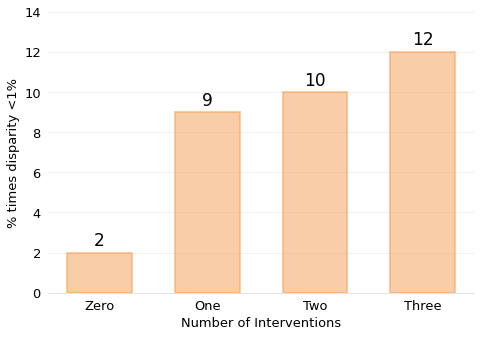

In [66]:
# percent of times privileged group performed worse than unprivileged group
x = ["Zero", "One", "Two", "Three"]
fig, ax = plt.subplots(figsize=(7, 5))
c = 'sandybrown'
rects1 = ax.bar(x, y_mean, color=c, edgecolor=c, alpha=0.55, width=0.6, linewidth=2)

plt.rcParams.update({'font.size': 17})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.bar_label(rects1, padding=3)
ax.set_ylim([0, 14])

ax.set_ylabel('% times disparity <1%')
#ax.set_ylabel('Group Fairness')
ax.set_xlabel('Number of Interventions')

fig.tight_layout()
#plt.show()
fig.savefig('./figures/group_fair_inter.png', dpi=600)

<h3>Individual Bias</h3>

In [49]:
ind_bias = {0:{"theil":[], "consis":[]}, 1:{"theil":[], "consis":[]}, 2:{"theil":[], "consis":[]}, 3:{"theil":[], "consis":[]}}
for dataset in [adult_df, german_df, compas_df, bank_df]:
    d = dataset[["Theil Index", "Consistency"]]
    for index, row in d.iterrows():
        k = num_interventions(index)
        #print(index, k, row["Theil Index"], row["Consistency"])
        ind_bias[k]["theil"].append(row["Theil Index"])
        ind_bias[k]["consis"].append(row["Consistency"])

theil_mean = [round(np.mean(ind_bias[k]["theil"])*100) for k in [0,1,2,3]]
consis_mean = [round(np.mean(ind_bias[k]["consis"])*100) for k in [0,1,2,3]]
theil_mean, consis_mean 

([14, 16, 19, 19], [89, 90, 91, 91])

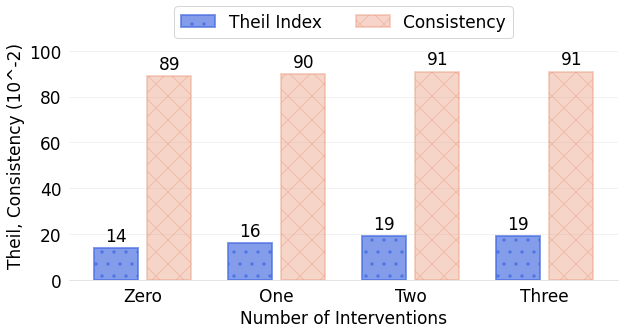

In [50]:
# percent of times privileged group performed worse than unprivileged group
x = np.arange(4)
x_lab = ["Zero", "One", "Two", "Three"]
fig, ax = plt.subplots(figsize=(9, 5))

width = 0.4 
c1, c2 = 'royalblue', 'darksalmon'
rects1 = ax.bar(x - width/2, theil_mean, label='Theil Index', color=c1, edgecolor=c1, linewidth=2, alpha=0.65, width=0.33, hatch='.')
rects2 = ax.bar(x + width/2, consis_mean, label='Consistency', color=c2, edgecolor=c2, linewidth=2, alpha=0.4, width=0.33, hatch='x')

plt.rcParams.update({'font.size': 17})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_ylim([0, 109])
ax.set_xticks(x, x_lab)
#ax.set_ylabel('% of times group fairness metric <0.01')
ax.set_ylabel('Theil, Consistency (10^-2)')
ax.set_xlabel('Number of Interventions')
ax.legend(bbox_to_anchor=(0.5, 1.13), loc='upper center', ncol=2)
fig.tight_layout()
#plt.show()
fig.savefig('./figures/ind_fair.png', dpi=600)

<h3>% Dominanace</h3>

In [51]:
# percentage of times one group is dominant over the other
priv_dom = {0:[], 1:[], 2:[], 3:[]}
unpriv_dom = {0:[], 1:[], 2:[], 3:[]}
thresh = 0.01
for dataset in [adult_df, german_df, compas_df, bank_df]:
#for dataset in [adult_df, compas_df]:
    d_sub = dataset[col_names]
    #d_sub = dataset[["False Positive Rate Diff"]]
    priv_dom_df = np.sum(d_sub>thresh, axis=1)/len(col_names)
    unpriv_dom_df = np.sum(d_sub< -thresh, axis=1)/len(col_names)
    for inter, val in priv_dom_df.items():
        k = num_interventions(inter)
        priv_dom[k].append(priv_dom_df.loc[inter])
        unpriv_dom[k].append(unpriv_dom_df.loc[inter])

priv_dom_mean = [round(np.mean(priv_dom[k])*100) for k in [0,1,2,3]]
unpriv_dom_mean = [round(np.mean(unpriv_dom[k])*100) for k in [0,1,2,3]]
priv_dom_mean, unpriv_dom_mean 

([56, 53, 52, 53], [42, 38, 38, 35])

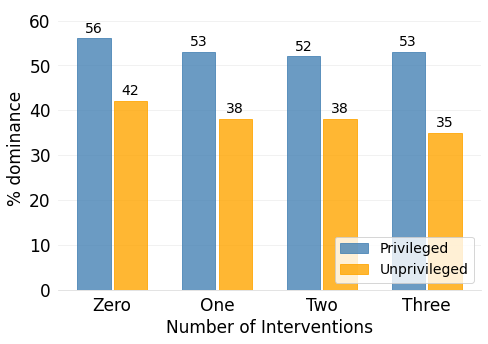

In [52]:
# percent of times privileged group performed worse than unprivileged group
x = np.arange(4)
x_lab = ["Zero", "One", "Two", "Three"]
fig, ax = plt.subplots(figsize=(7, 5))

width = 0.35
rects1 = ax.bar(x - width/2, priv_dom_mean, label='Privileged', color='steelblue', edgecolor='steelblue', alpha=0.8, width=0.32)
rects2 = ax.bar(x + width/2, unpriv_dom_mean, label='Unprivileged', color='orange', edgecolor='orange', alpha=0.8, width=0.32)

plt.rcParams.update({'font.size': 14})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_ylim([0, 63])
ax.set_xticks(x, x_lab)
#ax.set_ylabel('% of times group fairness metric <0.01')
ax.set_ylabel('% dominance')
ax.set_xlabel('Number of Interventions')
ax.legend(loc=4, ncol=1)
fig.tight_layout()
#plt.show()
fig.savefig('./figures/priv_unpriv_dom.png', dpi=600)

<h3>Base Rate</h3>

In [20]:
adult_df = pandas.read_csv("./data/All_Data -adult.csv", index_col=0)
(adult_df["Num True Pos - Privileged"] + adult_df["Num False Pos - Privileged"])/(adult_df["Num True Pos - Privileged"] + adult_df["Num True Neg - Privileged"] + adult_df["Num False Pos - Privileged"] + adult_df["Num False Neg - Privileged"])
#adult_df.columns

OP - 3             0.203430
OP - 11            0.201515
OP - 17            0.212598
OP + EOP - 3       0.128713
OP + EOP - 11      0.134275
                     ...   
GSR + CEOP - 11    0.155305
GSR + CEOP - 17    0.213572
GSR + ROC - 3      0.384903
GSR + ROC - 11     0.036168
GSR + ROC - 17     0.356460
Length: 180, dtype: float64

In [19]:
adult_df["Privileged base Rate"]

OP - 3             0.2034
OP - 11            0.2015
OP - 17            0.2126
OP + EOP - 3       0.1287
OP + EOP - 11      0.1343
                    ...  
GSR + CEOP - 11    0.1553
GSR + CEOP - 17    0.2136
GSR + ROC - 3      0.3849
GSR + ROC - 11     0.0362
GSR + ROC - 17     0.3565
Name: Privileged base Rate, Length: 180, dtype: float64

In [33]:
df = pd.concat([adult_df, german_df, bank_df, compas_df])
#df = pd.concat([adult_df, german_df, compas_df])
df = df[["Privileged base Rate", "Unprivileged base Rate", "base Rate"]]
#df = df.groupby(df.index).mean()

#base_rate = {0:{"priv": [], "unpriv":[]}, 1:{"priv": [], "unpriv":[]}, 2:{"priv": [], "unpriv":[]}, 3:{"priv": [], "unpriv":[]}}
base_rate = {0:{"priv": [], "unpriv":[], "tot":[]}, 
             1:{"priv": [], "unpriv":[], "tot":[]}, 
             2:{"priv": [], "unpriv":[], "tot":[]}, 
             3:{"priv": [], "unpriv":[], "tot":[]}}
for index, row in df.iterrows():
    k = num_interventions(index)
    #print(index, k, round(row["Privileged base Rate"],3), round(row["Unprivileged base Rate"],3))
    base_rate[k]["priv"].append(row["Privileged base Rate"])
    base_rate[k]["unpriv"].append(row["Unprivileged base Rate"])
    base_rate[k]["tot"].append(round(row["base Rate"], 4))

#base_rate

In [34]:
priv_base = {}
unpriv_base = {}
tot_base = {}

for i in base_rate:
    priv_base[i] = round(np.mean(base_rate[i]["priv"])*100)
    unpriv_base[i] = round(np.mean(base_rate[i]["unpriv"])*100)
    tot_base[i] = round(np.mean(base_rate[i]["tot"])*100)

x = np.arange(4)
priv_base = [priv_base[i] for i in x]
unpriv_base = [unpriv_base[i] for i in x]
tot_base = [tot_base[i] for i in x]
x_lab = ["Zero", "One", "Two", "Three"]

priv_base, unpriv_base, tot_base

([46, 44, 45, 50], [34, 38, 40, 44], [41, 42, 43, 48])

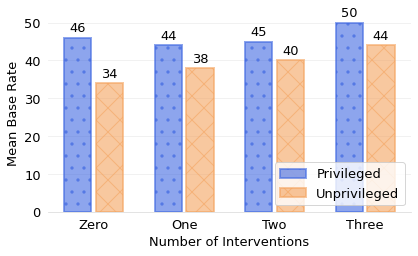

In [74]:
# code: https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(7, 5))
fig, ax = plt.subplots(figsize=(6, 3.75))
plt.rcParams.update({'font.size': 13})

c1, c2 = 'royalblue', 'sandybrown'
rects1 = ax.bar(x - width/2, priv_base, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
rects2 = ax.bar(x + width/2, unpriv_base, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Base Rate', size=13)
ax.set_xlabel('Number of Interventions', size=13)
#ax.set_title('Mean Accuracy and F1 Score by number of Interventions')
ax.set_xticks(x, x_lab)
#ax.set_ylim([0, 58])
#ax.legend(bbox_to_anchor=(0.5, 1.13), loc='upper center', ncol=2)
ax.legend(loc='lower right', ncol=1)
#ax.legend(bbox_to_anchor=(1.05, 1), ncol=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.show()
fig.savefig('./figures/base_rate.png', dpi=600)

<h3>Privileged group gets Discriminated</h3>

In [30]:
adult_df = pd.read_csv("./data/adult.csv", index_col=0)
compas_df = pd.read_csv("./data/compas.csv", index_col=0)
bank_df = pd.read_csv("./data/bank.csv", index_col=0)
german_df = pd.read_csv("./data/german.csv", index_col=0)

In [91]:
def grouped_bar_chart(xlabels, y1, y2, title):
    # code: https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/
    width = 0.35  # the width of the bars
    x = np.arange(len(xlabels))
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.rcParams.update({'font.size': 15})
    #c1, c2 = 'royalblue', 'darksalmon'
    c1, c2 = 'royalblue', 'sandybrown'
    rects1 = ax.bar(x - width/2, y1, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
    rects2 = ax.bar(x + width/2, y2, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('difference in FNR compared to baseline', size=17)
    #ax.set_xlabel('Number of Interventions')
    #ax.set_title('Change in False Positive Rate across different Interventions for COMPAS dataset', size=16)
    #ax.set_title(title, size=16)
    ax.set_xticks(x, xlabels, rotation = 90, size=15)
    ax.set_ylim([-29, 29])
    ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    #ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    #plt.show()
    #fig.savefig('./figures/base_rate.png', dpi=600)
    return fig

-8.813 10.64 1.827
-8.813 10.61 1.797
-8.813 8.7 -0.117
-8.813 10.64 1.827
-8.813 -4.23 -13.047
-8.813 17.66 8.847
-8.813 10.27 1.453
-8.813 3.48 -5.337
-8.813 17.04 8.23
-8.813 15.66 6.843
-8.813 8.36 -0.457
-8.813 9.17 0.353
-8.813 8.73 -0.08


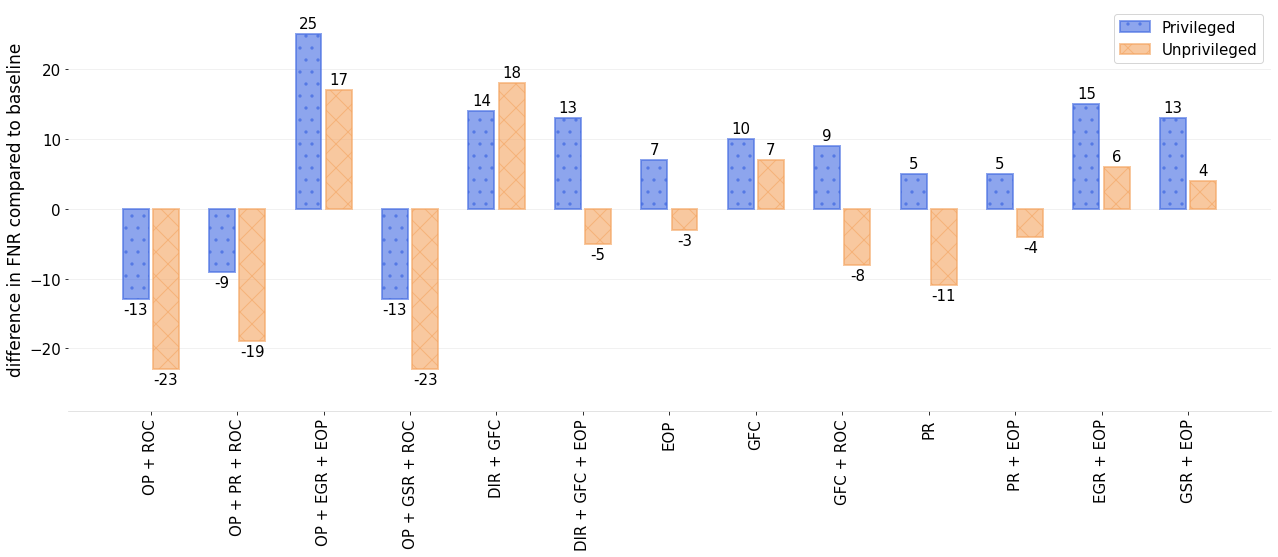

In [33]:
# Let's go with Compas dataset - False Positive Rate
# For compas dataset, positive means - No recidivate (label:0)
# so false positive means - Actually committed crime but labeled as innocent

#for data in [adult_df, compas_df, german_df, bank_df]:
for data in [adult_df]:
    #cols = ["False Positive Rate", "False Negative Rate", "False Discovery Rate", "False Omission Rate"]
    cols = ["False Negative Rate"]
    for metric in cols:
        b1 = data[metric + " - Privileged"]["Logistic Regression"]
        b2 = data[metric + " - Unprivileged"]["Logistic Regression"]
        #b1 = data['Privileged base Rate']["Logistic Regression"]
        #b2 = data['Unprivileged base Rate']["Logistic Regression"]
        m_ori = b1 - b2    # original metric value FPR Diff
        res = {"priv":[], "unpriv": []}
        row_names = []
        for index, row in data.iterrows():
            v1 = row[metric + " - Privileged"]
            v2 = row[metric + " - Unprivileged"]
            #v1 = row['Privileged base Rate']
            #v2 = row['Unprivileged base Rate']
            
            if index in ["OP + PR + CEOP", "OP + PR"]:
                continue
            
            m_new = v1 - v2    # new value for FPR Diff
            d1, d2 = v1-b1, v2-b2  # delta change in value
            #if abs(d1)>0.05 and abs(d2)>0.05 and d1*d2<0:
            if abs(m_new)-abs(m_ori)<0.05 and 0.03<abs(d1)<0.26 and 0.03<abs(d2)<0.32:
            #if abs(m_new)<abs(m_ori) and d1>0.01 and d2<0.01:
                print(round(m_ori*100,3), round((d1-d2)*100,2),round(m_new*100,3))
                res["priv"].append(round(d1,2)*100)
                res["unpriv"].append(round(d2,2)*100)
                row_names.append(index)

        fig = grouped_bar_chart(row_names, res["priv"], res["unpriv"], metric)
        #fig.savefig('./figures/fpr_compas.png', dpi=600)
        fig.savefig('./figures/fnr_adult.png', dpi=600)

In [138]:
#pd.crosstab(compas_df[])
from aif360.datasets import CompasDataset
c = CompasDataset().convert_to_dataframe()[0]
pd.crosstab(c["race"], c["two_year_recid"])

two_year_recid,0.0,1.0
race,,
0.0,2080,1987
1.0,1278,822


<h3>Error rate gets worse</h3>

In [23]:
adult_df = pd.read_csv("./data/adult.csv", index_col=0)
compas_df = pd.read_csv("./data/compas.csv", index_col=0)
bank_df = pd.read_csv("./data/bank.csv", index_col=0)
german_df = pd.read_csv("./data/german.csv", index_col=0)

In [48]:
def make_plot(y1, y2, metric):
    xlabels = ["One", "Two", "Three"]

    width = 0.35  # the width of the bars
    x = np.arange(len(xlabels))
    fig, ax = plt.subplots(figsize=(5, 3.75))
    plt.rcParams.update({'font.size': 13})
    c1, c2 = 'royalblue', 'sandybrown'
    rects1 = ax.bar(x - width/2, y1, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
    rects2 = ax.bar(x + width/2, y2, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ylabel = ''
    if metric=="F1 Score":
        ylabel = '% times f1 score improves'
    elif metric=="False Positive Rate":
        ylabel = '% times FPR increases'
    elif metric=="False Negative Rate":
        ylabel = '% times FNR increases'
    ax.set_ylabel(ylabel, size=13)
    ax.set_xlabel('Number of Interventions')
    #ax.set_title('Change in False Positive Rate across different Interventions for COMPAS dataset', size=16)
    #ax.set_title(title, size=16)
    ax.set_xticks(x, xlabels, rotation = 0, size=13)
    #ax.set_ylim([30, 70])
    if metric=="False Positive Rate":
        #ax.set_ylim([0, 30])
        ax.legend(loc='lower right')
        #ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
        #ax.legend(loc='lower right', bbox_to_anchor=(1, 0))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    #ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    fig.savefig('./figures/'+metric+'.png', dpi=600)

Metric:  False Positive Rate
{'priv': [13, 43, 41], 'unpriv': [20, 65, 60]}
[37, 44, 49] [57, 67, 71]
Metric:  False Negative Rate
{'priv': [20, 68, 58], 'unpriv': [16, 55, 44]}
[57, 70, 69] [46, 57, 52]


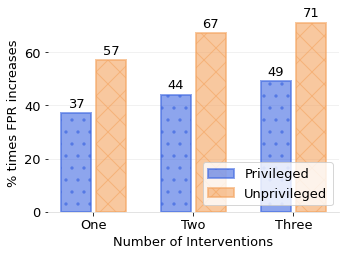

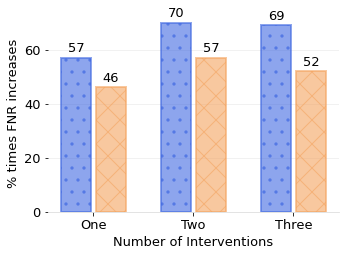

In [49]:
#cols = ["False Positive Rate", "False Negative Rate", "False Discovery Rate", "False Omission Rate", "Accuracy"]
cols = ["False Positive Rate", "False Negative Rate"]
    
for metric in cols:  
    print("Metric: ", metric)
    res = {"priv":[0, 0, 0], "unpriv": [0, 0, 0]}
    tot_cases = [0, 0, 0]

    for data in [adult_df, compas_df, german_df, bank_df]:
    #for data in [adult_df]:

        base_p = data[metric + " - Privileged"]["Logistic Regression"]
        base_u = data[metric + " - Unprivileged"]["Logistic Regression"]
        
    
        for index, row in data.iterrows():
            if index == "Logistic Regression":
                continue
                
            new_p = row[metric + " - Privileged"]
            new_u = row[metric + " - Unprivileged"]
            
            n = num_interventions(index)
            tot_cases[n-1] += 1
            
            if metric not in ["F1 Score", "Accuracy"]:     
                    
                if abs(new_p)>abs(base_p):
                    res["priv"][n-1] += 1

                if abs(new_u)>abs(base_u):
                    res["unpriv"][n-1] += 1
            else:
                
                if abs(new_p)>=abs(base_p):
                    res["priv"][n-1] += 1

                if abs(new_u)>=abs(base_u):
                    res["unpriv"][n-1] += 1
        
    print(res)
    priv_per = [round(res["priv"][i]/tot_cases[i]*100) for i in [0,1,2]]
    unpriv_per = [round(res["unpriv"][i]/tot_cases[i]*100) for i in [0,1,2]]
    print(priv_per, unpriv_per)
    make_plot(priv_per, unpriv_per, metric)

<h3>F1 score and Accuracy by group</h3>

In [47]:
adult_df = pd.read_csv("./data/adult.csv", index_col=0)
compas_df = pd.read_csv("./data/compas.csv", index_col=0)
bank_df = pd.read_csv("./data/bank.csv", index_col=0)
german_df = pd.read_csv("./data/german.csv", index_col=0)

all_data = pd.concat([adult_df, compas_df, bank_df, german_df])
#all_data = pd.concat([adult_df])
all_data.shape

(220, 30)

In [48]:
all_data["num_inter"] = [num_interventions(n) for n in all_data.index]
all_data.head()

,Accuracy,F1 Score,Theil Index,False Positive Rate - Unprivileged,False Positive Rate - Privileged,False Negative Rate - Unprivileged,False Negative Rate - Privileged,Accuracy - Unprivileged,Accuracy - Privileged,False Discovery Rate - Unprivileged,...,Num True Pos - Unprivileged,Num True Neg - Unprivileged,Num False Pos - Unprivileged,Num False Neg - Unprivileged,F1 Score - Privileged,F1 Score - Unprivileged,Privileged base Rate,Unprivileged base Rate,Consistency,num_inter
OP,0.790333,0.484567,0.177833,0.067033,0.104933,0.723933,0.564767,0.862167,0.754400,0.667300,...,145.666667,4067.000000,292.333333,381.333333,0.519900,0.301633,0.205833,0.089633,0.978767,1
OP + EOP,0.774533,0.369900,0.211633,0.070233,0.066933,0.722600,0.724200,0.859400,0.732133,0.675667,...,146.333333,4053.000000,306.333333,380.666667,0.386267,0.298667,0.130800,0.092633,0.919400,2
OP + CEOP,0.790333,0.484567,0.177833,0.067033,0.104933,0.723933,0.564767,0.862167,0.754400,0.667300,...,145.666667,4067.000000,292.333333,381.333333,0.519900,0.301633,0.205833,0.089633,0.978767,2
OP + ROC,0.684867,0.530900,0.119067,0.367667,0.311200,0.240433,0.258700,0.645900,0.704433,0.799533,...,400.000000,2755.666667,1603.666667,127.000000,0.605067,0.316667,0.442633,0.409933,0.954533,2
OP + GFC,0.786900,0.407333,0.201133,0.063667,0.059767,0.728900,0.688400,0.864600,0.748033,0.659300,...,143.000000,4081.666667,277.666667,384.000000,0.430500,0.301567,0.136733,0.086067,0.988200,2


In [49]:
f1_p = all_data.groupby("num_inter").mean()["F1 Score - Privileged"].tolist()
f1_u = all_data.groupby("num_inter").mean()["F1 Score - Unprivileged"].tolist()

In [50]:
f1_p = [round(x*100) for x in f1_p]
f1_u = [round(x*100) for x in f1_u]
f1_p, f1_u

([69, 64, 60, 61], [63, 56, 51, 49])

In [51]:
all_data[["Accuracy", "Accuracy - Unprivileged", "Accuracy - Privileged"]]

,Accuracy,Accuracy - Unprivileged,Accuracy - Privileged
OP,0.790333,0.862167,0.754400
OP + EOP,0.774533,0.859400,0.732133
OP + CEOP,0.790333,0.862167,0.754400
OP + ROC,0.684867,0.645900,0.704433
OP + GFC,0.786900,0.864600,0.748033
...,...,...,...
EGR + ROC,0.741133,0.591000,0.778033
GSR,0.742233,0.616167,0.773933
GSR + EOP,0.713367,0.616167,0.737767
GSR + CEOP,0.725567,0.616167,0.753033


In [55]:
# checking if net accuracy is always in between of the two groups
for index, row in all_data.iterrows():
    max_acc = max(row["Accuracy - Unprivileged"], row["Accuracy - Privileged"])
    min_acc = min(row["Accuracy - Unprivileged"], row["Accuracy - Privileged"])
    if not (min_acc<row["Accuracy"] and row["Accuracy"]<max_acc):
        print(min_acc, row["Accuracy"], max_acc)

In [56]:
all_data.groupby("num_inter").mean()["Accuracy"]

num_inter
0    0.792525
1    0.754819
2    0.724473
3    0.700744
Name: Accuracy, dtype: float64

In [57]:
acc_p = all_data.groupby("num_inter").mean()["Accuracy - Privileged"].tolist()
acc_u = all_data.groupby("num_inter").mean()["Accuracy - Unprivileged"].tolist()

acc_p, acc_u

([0.7874083332499999,
  0.7545428571428571,
  0.7239841924364262,
  0.7045785714007936],
 [0.7682833333333333,
  0.7238790476380953,
  0.697067697580756,
  0.6733249999920635])

In [58]:
acc_p = all_data.groupby("num_inter").mean()["Accuracy - Privileged"].tolist()
acc_u = all_data.groupby("num_inter").mean()["Accuracy - Unprivileged"].tolist()

acc_p = [round(x*100) for x in acc_p]
acc_u = [round(x*100) for x in acc_u]
acc_p, acc_u

([79, 75, 72, 70], [77, 72, 70, 67])

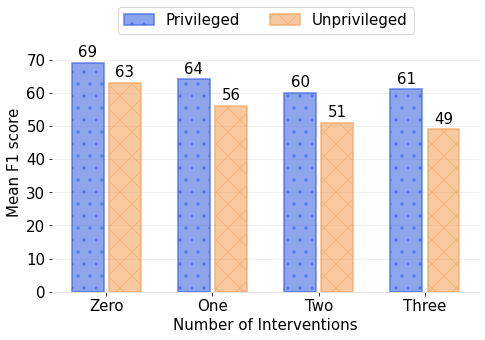

In [53]:
xlabels = ["Zero", "One", "Two", "Three"]
width = 0.35  # the width of the bars
x = np.arange(len(xlabels))
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 15})
#c1, c2 = 'royalblue', 'darksalmon'
c1, c2 = 'royalblue', 'sandybrown'
rects1 = ax.bar(x - width/2, f1_p, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
rects2 = ax.bar(x + width/2, f1_u, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean F1 score', size=15)
ax.set_xlabel('Number of Interventions')
    #ax.set_title('Change in False Positive Rate across different Interventions for COMPAS dataset', size=16)
    #ax.set_title(title, size=16)
ax.set_xticks(x, xlabels, rotation = 0, size=15)
ax.set_ylim([0, 78])
ax.legend(bbox_to_anchor=(0.5, 1.13), loc='upper center', ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
#ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.show()
fig.savefig('./figures/f1_score.png', dpi=600)

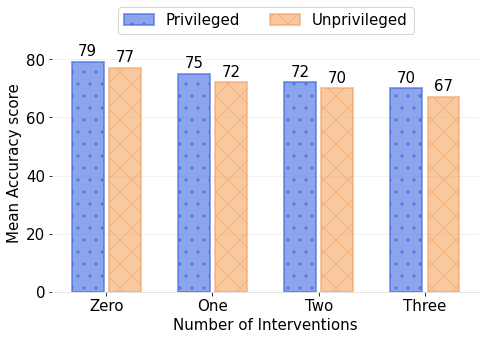

In [54]:
xlabels = ["Zero", "One", "Two", "Three"]
width = 0.35  # the width of the bars
x = np.arange(len(xlabels))
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 15})
#c1, c2 = 'royalblue', 'darksalmon'
c1, c2 = 'royalblue', 'sandybrown'
rects1 = ax.bar(x - width/2, acc_p, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
rects2 = ax.bar(x + width/2, acc_u, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Accuracy score', size=15)
ax.set_xlabel('Number of Interventions')
    #ax.set_title('Change in False Positive Rate across different Interventions for COMPAS dataset', size=16)
    #ax.set_title(title, size=16)
ax.set_xticks(x, xlabels, rotation = 0, size=15)
ax.set_ylim([0, 89])
ax.legend(bbox_to_anchor=(0.5, 1.13), loc='upper center', ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
#ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.show()
fig.savefig('./figures/accuracy_score.png', dpi=600)